# CNN - Simple Architecture

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as K
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_curve, auc
# from tensorflow.keras import datasets, layers, models

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

2024-11-26 01:01:06.233594: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-26 01:01:06.243820: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732600866.255264   26811 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732600866.258768   26811 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-26 01:01:06.273864: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# Preparation for trainning - Train Split

In [3]:
path = os.path.realpath('data/Dataset of Breast mammography images with Masses')
list_path = path.split('/')
list_path.remove('notebooks')
list_path.remove('breast-cancer-project')
path = os.path.join('/'.join(list_path), 'Image After Data Augmentation, Image Size 224x224/')

In [4]:
batch_size_n = 128

In [5]:
train_ds =tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(224, 224),
    batch_size=batch_size_n,
)

Found 7632 files belonging to 8 classes.
Using 6106 files for training.


I0000 00:00:1732600868.078565   26811 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1756 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Ti Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [6]:
classes_ = train_ds.class_names
classes_

['Density1Benign',
 'Density1Malignant',
 'Density2Benign',
 'Density2Malignant',
 'Density3Benign',
 'Density3Malignant',
 'Density4Benign',
 'Density4Malignant']

In [7]:
classes_ = train_ds.class_names
len(classes_)

8

In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(224, 224),
    batch_size=batch_size_n,
)

Found 7632 files belonging to 8 classes.
Using 1526 files for validation.


In [9]:
def normalize(image, label):
  return tf.cast(image/255., tf.float32), label

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)

train_ds, val_ds

(<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

# Preparation for trainning - Test Split

In [10]:
path = os.path.realpath('data/Dataset of Breast mammography images with Masses')
list_path = path.split('/')
list_path.remove('notebooks')
list_path.remove('breast-cancer-project')
path = os.path.join('/'.join(list_path), 'Image Before Data Augmentation, Image Size 224x224/')

In [11]:
train_ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(224, 224),
    batch_size=batch_size_n,
)

Found 212 files belonging to 8 classes.
Using 170 files for training.


In [12]:
val_ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(224, 224),
    batch_size=batch_size_n,
)

Found 212 files belonging to 8 classes.
Using 42 files for validation.


In [13]:
def normalize(image, label):
  return tf.cast(image/255., tf.float32), label

train_ds_test = train_ds_test.map(normalize)
val_ds_test = val_ds_test.map(normalize)

train_ds_test, val_ds_test

(<_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

# Training

In [14]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', kernel_initializer="HeNormal",input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', kernel_initializer="HeNormal"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(8, activation='softmax')
])

/home/viviane/apps/anaconda3/envs/pro1-cnn/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

In [16]:
epochs = 50
history = model.fit(train_ds,
                    validation_data=val_ds,
                    batch_size=batch_size_n,
                    epochs=epochs)

Epoch 1/50


I0000 00:00:1732600870.719363   26912 service.cc:148] XLA service 0x7fed640098d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732600870.719498   26912 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-11-26 01:01:10.792942: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1732600871.217936   26912 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-26 01:01:11.788314: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_283', 4 bytes spill stores, 4 bytes spill loads

2024-11-26 01:01:13.089861: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.04GiB with freed_by_count=0. The call

47/48 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.2226 - loss: 4.2632

2024-11-26 01:01:24.017626: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_283', 4 bytes spill stores, 4 bytes spill loads



48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.2225 - loss: 4.2363

2024-11-26 01:01:28.842834: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.04GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-11-26 01:01:31.391501: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.04GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


48/48 ━━━━━━━━━━━━━━━━━━━━ 23s 269ms/step - accuracy: 0.2225 - loss: 4.2105 - val_accuracy: 0.2379 - val_loss: 1.8417
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.2877 - loss: 1.7975 - val_accuracy: 0.3820 - val_loss: 1.6604
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.3964 - loss: 1.5415 - val_accuracy: 0.4548 - val_loss: 1.3882
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.5871 - loss: 1.1246 - val_accuracy: 0.6048 - val_loss: 1.0756
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.7879 - loss: 0.7086 - val_accuracy: 0.7431 - val_loss: 0.7588
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.9029 - loss: 0.3718 - val_accuracy: 0.8263 - val_loss: 0.5309
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9632 - loss: 0.1727 - val_accuracy: 0.8663 - val_loss: 0.4544
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.9877 - loss: 0.0862 - val_accuracy: 0.9010 - val_loss: 

# Evaluating

In [17]:
history.history

{'accuracy': [0.22011137008666992,
  0.30904027819633484,
  0.422698974609375,
  0.6298722624778748,
  0.8193579912185669,
  0.9169669151306152,
  0.9677366614341736,
  0.9898460507392883,
  0.9970520734786987,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [2.7865586280822754,
  1.7551721334457397,
  1.4606949090957642,
  1.0490177869796753,
  0.6281232237815857,
  0.3255770802497864,
  0.15533582866191864,
  0.08022400736808777,
  0.03980069234967232,
  0.02189730852842331,
  0.014095365069806576,
  0.009332678280770779,
  0.006777892354875803,
  0.005212351679801941,
  0.004206059500575066,
  0.003470903029665351,
  0.002893342636525631,
  0.002461023861542344,
  0.002095638308674097,
  0.0017941504484042525,
  0.0015870443312451243,
  0

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,972,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,932,922 (68.41 MB)

 Trainable params: 5,977,640 (22.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,955,282 (45.61 MB)

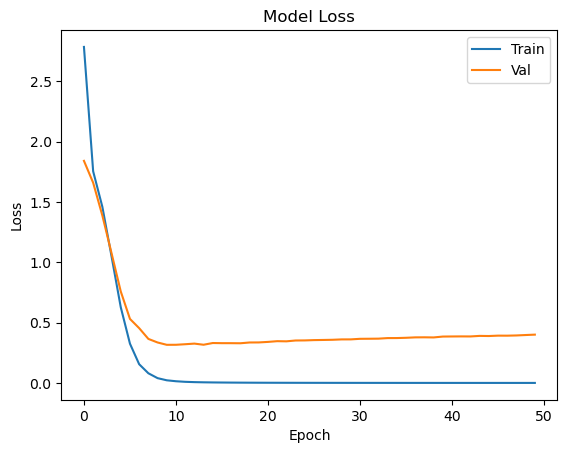

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

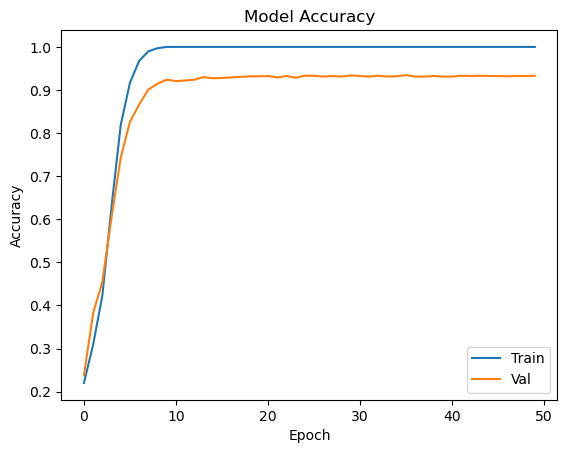

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [21]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

12/12 - 0s - 25ms/step - accuracy: 0.9332 - loss: 0.4006


In [22]:
print(test_acc)

0.9331585764884949


In [23]:
predictions = model.predict(train_ds_test)
val_pred = np.argmax(predictions, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step  


In [24]:
y_true = []
y_pred = []
for images, labels in val_ds_test:
  # Make predictions on the batch
  batch_pred = model.predict(images)
  y_pred.extend(list(batch_pred.argmax(axis=1)))  # Predicted labels
  y_true.extend(list(labels.numpy()))  # True labels from the batch

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 544ms/step


2024-11-26 01:04:51.333558: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


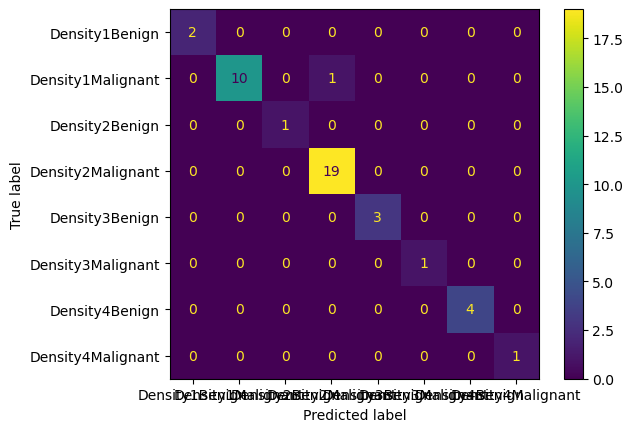

In [25]:
disp = ConfusionMatrixDisplay(cm, display_labels=classes_,)
disp.plot()

In [26]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.91      0.95        11
           2       1.00      1.00      1.00         1
           3       0.95      1.00      0.97        19
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         1

    accuracy                           0.98        42
   macro avg       0.99      0.99      0.99        42
weighted avg       0.98      0.98      0.98        42



In [27]:
# fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Test

In [28]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_path = os.path.join(path, 'Density2Benign/20586960.png')

img = load_img(img_path, target_size=(224, 224))

x = img_to_array(img)
x = x / 255.0  
x = np.expand_dims(x, axis=0)  

preds = model.predict(x)
predicted_class_index = np.argmax(preds[0])

class_labels = classes_  
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class:", predicted_class_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
Predicted class: Density2Benign


# Heatmap

In [29]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras

# Display
from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt

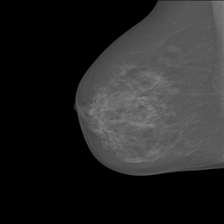

In [30]:
display(Image(img_path))

In [31]:
grad_model = keras.models.Model(
    [model.inputs],
    [model.get_layer('conv2d_1').output,
     model.get_layer('conv2d_1').output]) #right here you should put your last layer's name (you can figure that out from running model.summary) mine was 'dense_2'

grad_model = Model(
    inputs=model.inputs,
    outputs=[conv_layer_output, model.output]
)

In [32]:
with tf.GradientTape() as tape:
    # Forward pass through grad_model
    last_conv_layer_output, preds = grad_model(x)
        
    # Use the predicted class if no index is provided
    # pred_index = tf.argmax(preds[0])
    class_channel = preds[:, predicted_class_index]

    # Compute the gradient of the top predicted class for the input image
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # Compute pooled gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by "how important this channel is"
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    heatmap.numpy()

/home/viviane/apps/anaconda3/envs/pro1-cnn/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: [['keras_tensor']]. Received: the structure of inputs=*
  warnings.warn(


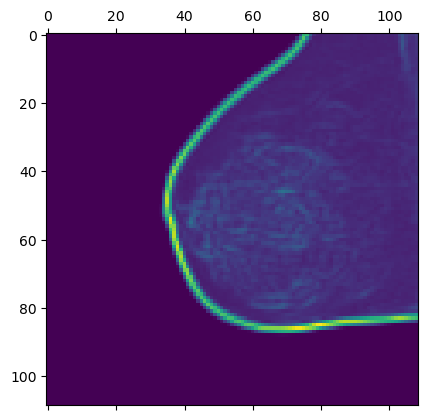

In [33]:
# Generate class activation heatmap
# heatmap = make_gradcam_heatmap(img_array=x, model=model, last_conv_layer_name=conv_layer_output)

# Display heatmap
plt.matshow(heatmap)
plt.show()

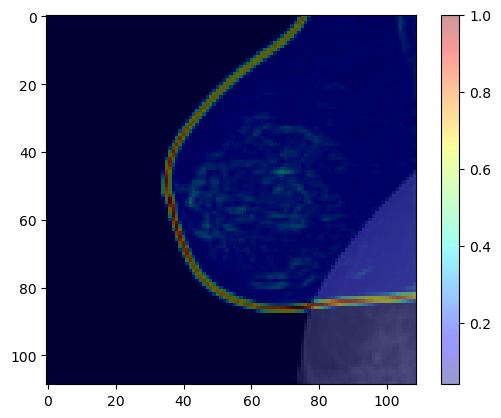

In [34]:
plt.imshow(img)
plt.imshow(heatmap, cmap='jet', alpha=0.4)
plt.colorbar()
plt.show()

In [35]:
# ValueError: layers are: ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1'].

# Save

In [36]:
# model.save('breast-cancer-project/breast_cancer_classification-sa.h5')

In [37]:
# model.export('breast-cancer-project/breast_cancer_classification-sa-export.h5')